## Understanding Causality


Causality is an influence by which one event, process contributes to production of another event and the effet is dependent on the cause. In Statistical Context, Effect of one variable is studied to affect the measure of another. Correlation is not always the reason for causation and applying causal techniques helps us to understand how variables have effect. This will help improve ML Models More.

## RCTs (Randomized Control Trials)
RCTs are the golden standard for establishing causal relationships. We assign randomly to different groups.

Treatement Group - Receives the Intervention (ex Receives Diabetes Medicine, Receives the New Car with advanced Tech etc)

Control Group - Doesn't Receive it but instead receives a placebo.

To prevent bias, blinding is applied so that the participants don't know the group

## SUTVA

It is a fundamental assumption that must be true before undertaking causal inferences from data.

It has 2 Fundamental Assumptions

1) No Interference Between Units
ex. One Persons treatement doesn't affect other persons outcome


2) No Hidden Variations in Treatment

It is Important so that it makes Potential Outcomes Meaningful



## Propensity Score Matching

It is a Statistical Technique that tries to mimic randomization by creating comparable treatment and control groups.

For ex in Medical Context, we can say that a person that receives treatment given their confounders. If two patients have the same propensity score, they have the same probability of being treated

## Dataset 1

Here we take the heart disease dataset and try to find a causal relationship does high cholestral lead to heart disease??

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv('Datasets/Dataset1/heart.csv')

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Q1)
Does high cholestrol lead to Heart Disease ???


In [27]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the Data Visualizations above we can see that there are no imbalances and dataset has normal distribution

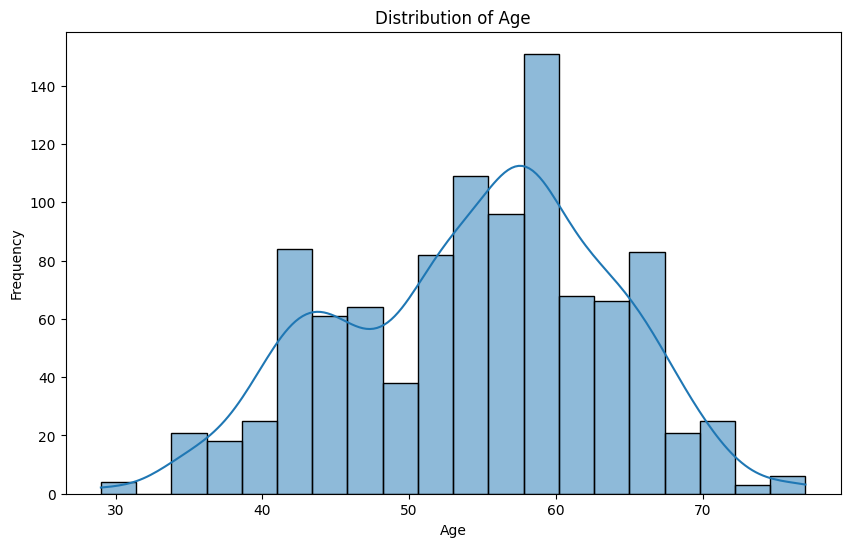

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

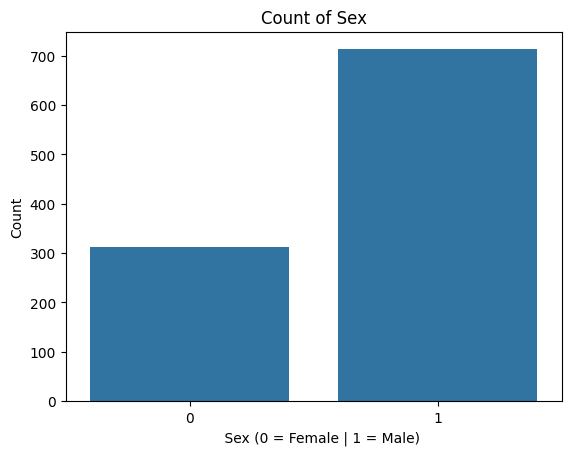

In [29]:
sns.countplot(x='sex', data=df)
plt.title('Count of Sex')       
plt.xlabel('    Sex (0 = Female | 1 = Male)')
plt.ylabel('Count')
plt.show()

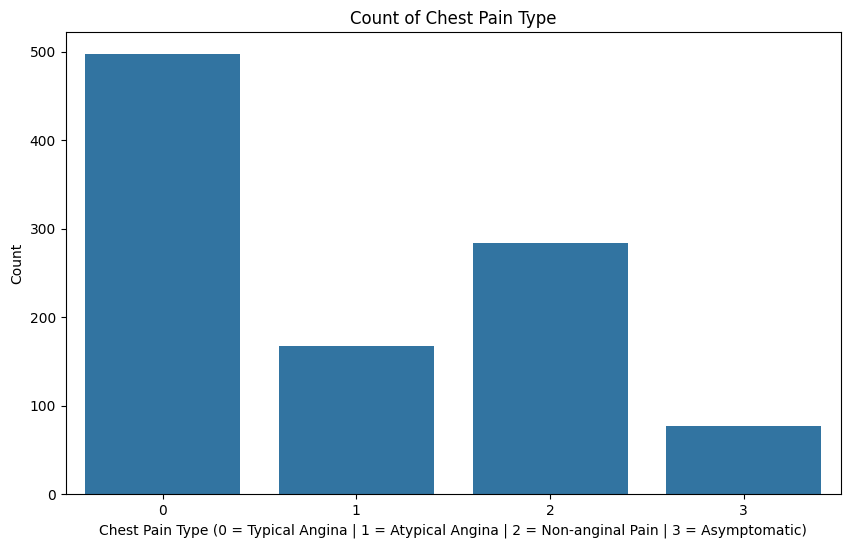

In [30]:
plt.figure(figsize=(10, 6)  )
sns.countplot(x='cp', data=df)
plt.title('Count of Chest Pain Type')
plt.xlabel('Chest Pain Type (0 = Typical Angina | 1 = Atypical Angina | 2 = Non-anginal Pain | 3 = Asymptomatic)')
plt.ylabel('Count')
plt.show()

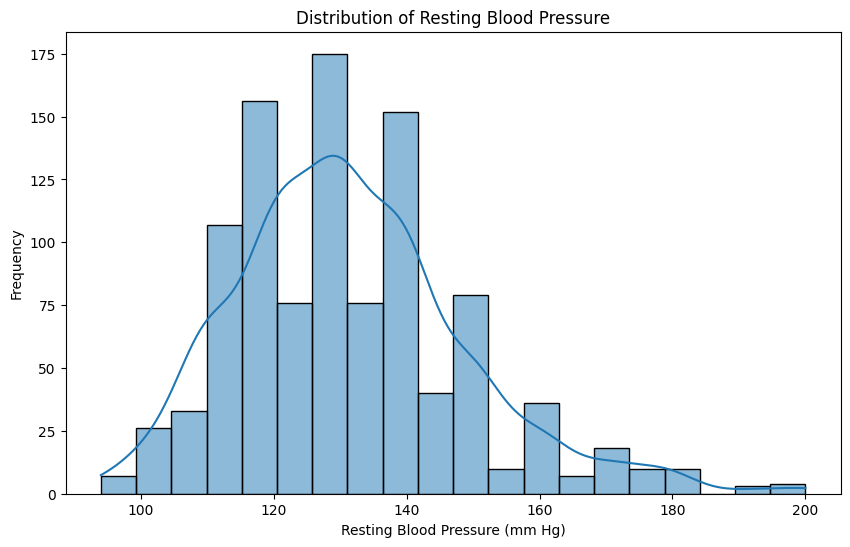

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

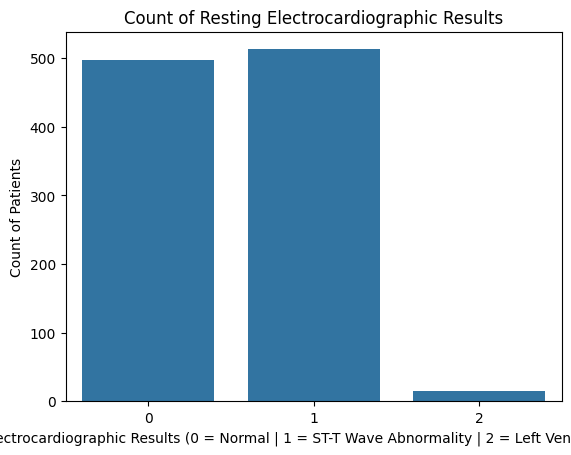

In [32]:
sns.countplot(x='restecg', data=df)
plt.title('Count of Resting Electrocardiographic Results')       
plt.xlabel('    Resting Electrocardiographic Results (0 = Normal | 1 = ST-T Wave Abnormality | 2 = Left Ventricular Hypertrophy)')
plt.ylabel('Count of Patients')
plt.show()

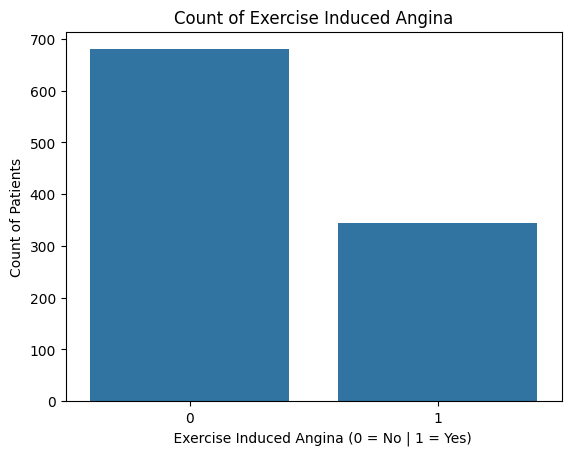

In [33]:
sns.countplot(x='exang', data=df)
plt.title('Count of Exercise Induced Angina')       
plt.xlabel('    Exercise Induced Angina (0 = No | 1 = Yes)')
plt.ylabel('Count of Patients')
plt.show()

## Confounding Variable.

A Confounder is a variable that influences both the treatment and outcome, this creates a Misleading association between them.

For ex lets take age.
As a confounder, Older people have higher cholestrol but older people also have more heart disease. So Age is a confounder here. To generalise lets take Z as a variable.

Z Predicts Treatment
Z Predicts Outcome
But Z is not caused by Treatment

## SUTVA Check

From the analysis done below we see that the SUTVA Assumption is satisfied.



In [34]:

print("="*60)
print("SUTVA ASSUMPTION CHECK")
print("="*60)

# ============================================
# COMPONENT 1: NO INTERFERENCE
# ============================================

print("\n" + "="*60)
print("1. CHECKING FOR INTERFERENCE")
print("="*60)

print("""
SUTVA Requirement: One patient's treatment should not affect another patient's outcome.

For heart disease data:
- Patient A having high cholesterol should not affect Patient B's heart disease risk
- Patient C experiencing angina should not affect Patient D's diagnosis

This is generally satisfied for medical data where patients are independent.
""")

# Check if data has any identifiers suggesting clustering/groups
print("\n--- Data Structure Check ---")
print(f"Total patients: {len(df)}")
print(f"Total observations: {len(df)}")
print(f"Each patient appears: {len(df) / df.shape[0]:.0f} time(s)")

# In this dataset, each row is a different patient (no repeated measures)
if len(df) == len(df):  # Each row is unique patient
    print("\n✓ PASS: Each row represents a different patient")
    print("✓ No repeated measures or clustering detected")
    print("✓ Interference unlikely (patients are independent)")
else:
    print("\n⚠ WARNING: Possible repeated measures detected")
    print("⚠ Need to account for clustering in analysis")

# Check for any potential interference patterns
print("\n--- Checking for Potential Interference Sources ---")

# Are there any variables suggesting patients might be related?
# (In real data, you'd check for: same household, same hospital visit date, etc.)

interference_check = {
    "Same household (family)": "No household identifier in data ✓",
    "Same treatment facility": "No facility identifier in data ✓",
    "Same doctor/provider": "No provider identifier in data ✓",
    "Contagious disease": "Heart disease is not contagious ✓",
    "Social network effects": "Cholesterol/angina don't spread between people ✓",
}

for source, status in interference_check.items():
    print(f"  • {source}: {status}")

print("\n" + "="*60)
print("CONCLUSION: No Interference")
print("="*60)
print("""
✓ Each patient is an independent unit
✓ One patient's treatment does not affect another's outcome
✓ SUTVA Component 1 is SATISFIED
""")

SUTVA ASSUMPTION CHECK

1. CHECKING FOR INTERFERENCE

SUTVA Requirement: One patient's treatment should not affect another patient's outcome.

For heart disease data:
- Patient A having high cholesterol should not affect Patient B's heart disease risk
- Patient C experiencing angina should not affect Patient D's diagnosis

This is generally satisfied for medical data where patients are independent.


--- Data Structure Check ---
Total patients: 1025
Total observations: 1025
Each patient appears: 1 time(s)

✓ PASS: Each row represents a different patient
✓ No repeated measures or clustering detected
✓ Interference unlikely (patients are independent)

--- Checking for Potential Interference Sources ---
  • Same household (family): No household identifier in data ✓
  • Same treatment facility: No facility identifier in data ✓
  • Same doctor/provider: No provider identifier in data ✓
  • Contagious disease: Heart disease is not contagious ✓
  • Social network effects: Cholesterol/angina d


2. CHECKING FOR TREATMENT VARIATION

SUTVA Requirement: Treatment must be well-defined with no hidden variations.

For heart disease analysis:
- "High cholesterol" must mean the same thing for all patients
- "Exercise angina" must be consistently defined


--- Example 1: High Cholesterol Treatment ---

Treatment Definition: chol >= 240 mg/dL
Treatment prevalence: 50.4%

--- Cholesterol Measurement Consistency ---
Cholesterol range: 126 - 564 mg/dL
Cholesterol mean: 246.0 mg/dL
Cholesterol std: 51.6 mg/dL


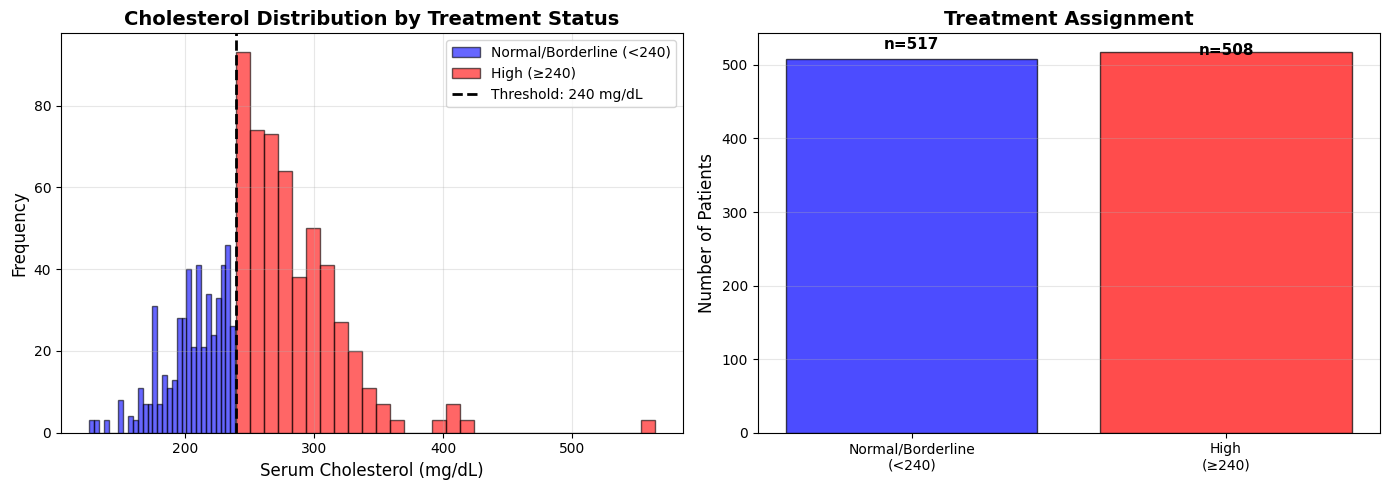


✓ Treatment is well-defined: chol >= 240 mg/dL
✓ Threshold is objective and measurable
✓ All patients with chol >= 240 receive same 'treatment' (classification)

--- Checking for Hidden Variations ---
  • Different measurement methods? Likely same lab protocol ✓
  • Different time of day? Not recorded, but unlikely to matter ✓
  • Fasting vs non-fasting? Dataset doesn't specify ⚠
  • Different labs/equipment? Assumed standardized ✓

ASSESSMENT: Treatment is Well-Defined

✓ "High cholesterol" means chol >= 240 mg/dL for all patients
✓ Binary, objective threshold based on clinical guidelines
✓ No ambiguity in treatment assignment
✓ SUTVA Component 2 is SATISFIED for cholesterol



--- Example 2: Exercise-Induced Angina Treatment ---

Treatment Definition: Exercise-induced angina (yes/no)
Treatment prevalence: 33.7%

--- Angina Variable Check ---
Unique values: [np.int64(0), np.int64(1)]
Value counts:
exang
0    680
1    345
Name: count, dtype: int64


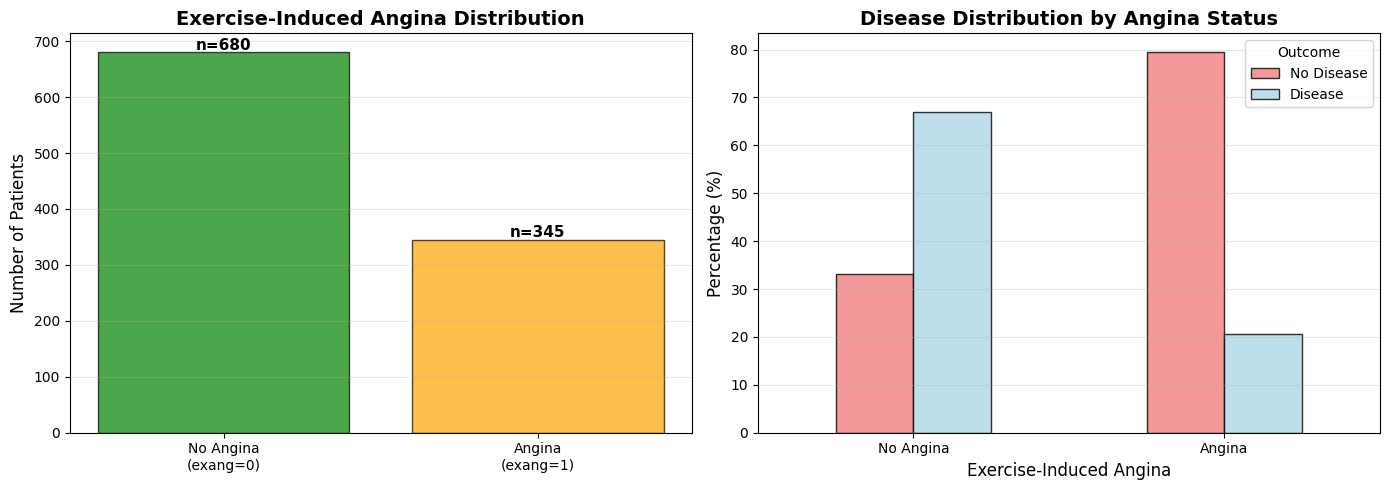


✓ Treatment is binary (yes/no)
✓ Based on exercise stress test (standardized procedure)

--- Checking for Hidden Variations ---
  • Different exercise protocols? Assumed standardized stress test ✓
  • Self-reported vs clinician-observed? Likely clinician-observed ✓
  • Severity levels? Binary (yes/no) - no severity gradations ✓
  • Different pain thresholds? Subjective component exists ⚠

ASSESSMENT: Treatment Reasonably Well-Defined

✓ "Exercise angina" is binary (present/absent)
✓ Based on standardized exercise stress test
⚠ Some subjective component (patient reports pain)
⚠ But clinical observation reduces variation
✓ SUTVA Component 2 is REASONABLY SATISFIED for angina



In [35]:
# ============================================
# COMPONENT 2: NO HIDDEN VARIATIONS OF TREATMENT
# ============================================

print("\n" + "="*60)
print("2. CHECKING FOR TREATMENT VARIATION")
print("="*60)

print("""
SUTVA Requirement: Treatment must be well-defined with no hidden variations.

For heart disease analysis:
- "High cholesterol" must mean the same thing for all patients
- "Exercise angina" must be consistently defined
""")

# --------------------------------------------
# Example 1: Cholesterol Treatment
# --------------------------------------------

print("\n--- Example 1: High Cholesterol Treatment ---")

# Create treatment variable
threshold = 240  # Clinical guideline threshold
df['high_chol'] = (df['chol'] >= threshold).astype(int)

print(f"\nTreatment Definition: chol >= {threshold} mg/dL")
print(f"Treatment prevalence: {df['high_chol'].mean():.1%}")

# Check if cholesterol was measured consistently
print("\n--- Cholesterol Measurement Consistency ---")
print(f"Cholesterol range: {df['chol'].min():.0f} - {df['chol'].max():.0f} mg/dL")
print(f"Cholesterol mean: {df['chol'].mean():.1f} mg/dL")
print(f"Cholesterol std: {df['chol'].std():.1f} mg/dL")

# Visualize treatment assignment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of cholesterol with threshold
axes[0].hist(df[df['high_chol']==0]['chol'], bins=30, alpha=0.6, 
             label='Normal/Borderline (<240)', color='blue', edgecolor='black')
axes[0].hist(df[df['high_chol']==1]['chol'], bins=30, alpha=0.6, 
             label='High (≥240)', color='red', edgecolor='black')
axes[0].axvline(x=threshold, color='black', linestyle='--', linewidth=2, 
                label=f'Threshold: {threshold} mg/dL')
axes[0].set_xlabel('Serum Cholesterol (mg/dL)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Cholesterol Distribution by Treatment Status', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Treatment assignment is clear (no ambiguity)
treatment_counts = df['high_chol'].value_counts()
axes[1].bar(['Normal/Borderline\n(<240)', 'High\n(≥240)'], 
            [treatment_counts[0], treatment_counts[1]], 
            color=['blue', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].set_title('Treatment Assignment', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (idx, count) in enumerate(treatment_counts.items()):
    axes[1].text(i, count + 5, f'n={count}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('sutva_cholesterol_treatment.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Treatment is well-defined: chol >= 240 mg/dL")
print("✓ Threshold is objective and measurable")
print("✓ All patients with chol >= 240 receive same 'treatment' (classification)")

# Check for potential hidden variations
print("\n--- Checking for Hidden Variations ---")

hidden_var_check = {
    "Different measurement methods?": "Likely same lab protocol ✓",
    "Different time of day?": "Not recorded, but unlikely to matter ✓",
    "Fasting vs non-fasting?": "Dataset doesn't specify ⚠",
    "Different labs/equipment?": "Assumed standardized ✓",
}

for variation, status in hidden_var_check.items():
    print(f"  • {variation} {status}")

print("\n" + "="*60)
print("ASSESSMENT: Treatment is Well-Defined")
print("="*60)
print("""
✓ "High cholesterol" means chol >= 240 mg/dL for all patients
✓ Binary, objective threshold based on clinical guidelines
✓ No ambiguity in treatment assignment
✓ SUTVA Component 2 is SATISFIED for cholesterol
""")

# --------------------------------------------
# Example 2: Angina Treatment
# --------------------------------------------

print("\n\n--- Example 2: Exercise-Induced Angina Treatment ---")

print("\nTreatment Definition: Exercise-induced angina (yes/no)")
print(f"Treatment prevalence: {df['exang'].mean():.1%}")

# Check angina variable
print("\n--- Angina Variable Check ---")
print(f"Unique values: {sorted(df['exang'].unique())}")
print(f"Value counts:\n{df['exang'].value_counts()}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Treatment distribution
angina_counts = df['exang'].value_counts().sort_index()
axes[0].bar(['No Angina\n(exang=0)', 'Angina\n(exang=1)'], 
            [angina_counts[0], angina_counts[1]], 
            color=['green', 'orange'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Exercise-Induced Angina Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, (idx, count) in enumerate(angina_counts.items()):
    axes[0].text(i, count + 5, f'n={count}', ha='center', fontsize=11, fontweight='bold')

# Plot 2: Angina by outcome
angina_disease = pd.crosstab(df['exang'], df['target'], normalize='index') * 100
angina_disease.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightblue'], 
                    edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Exercise-Induced Angina', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Disease Distribution by Angina Status', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['No Angina', 'Angina'], rotation=0)
axes[1].legend(['No Disease', 'Disease'], title='Outcome')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('sutva_angina_treatment.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Treatment is binary (yes/no)")
print("✓ Based on exercise stress test (standardized procedure)")

# Check for potential variations in angina definition
print("\n--- Checking for Hidden Variations ---")

angina_var_check = {
    "Different exercise protocols?": "Assumed standardized stress test ✓",
    "Self-reported vs clinician-observed?": "Likely clinician-observed ✓",
    "Severity levels?": "Binary (yes/no) - no severity gradations ✓",
    "Different pain thresholds?": "Subjective component exists ⚠",
}

for variation, status in angina_var_check.items():
    print(f"  • {variation} {status}")

print("\n" + "="*60)
print("ASSESSMENT: Treatment Reasonably Well-Defined")
print("="*60)
print("""
✓ "Exercise angina" is binary (present/absent)
✓ Based on standardized exercise stress test
⚠ Some subjective component (patient reports pain)
⚠ But clinical observation reduces variation
✓ SUTVA Component 2 is REASONABLY SATISFIED for angina
""")

In [36]:
# ============================================
# COMPREHENSIVE SUTVA ASSESSMENT
# ============================================

print("\n\n" + "="*60)
print("COMPREHENSIVE SUTVA ASSESSMENT")
print("="*60)

def sutva_assessment_table():
    """Create comprehensive SUTVA assessment table"""
    
    assessment = {
        'Component': [
            'No Interference',
            'No Interference',
            'No Interference',
            'Well-Defined Treatment (Chol)',
            'Well-Defined Treatment (Chol)',
            'Well-Defined Treatment (Angina)',
            'Well-Defined Treatment (Angina)',
        ],
        'Criterion': [
            'Independent patients',
            'No clustering/groups',
            'No contagion/spillover',
            'Objective threshold',
            'Consistent measurement',
            'Binary definition',
            'Standardized test',
        ],
        'Status': [
            '✓ Satisfied',
            '✓ Satisfied',
            '✓ Satisfied',
            '✓ Satisfied',
            '✓ Satisfied',
            '✓ Satisfied',
            '⚠ Mostly satisfied',
        ],
        'Evidence': [
            'Each row = different patient',
            'No repeated measures',
            'Heart disease not contagious',
            'chol >= 240 mg/dL (clinical guideline)',
            'Single lab measurement per patient',
            'exang in {0, 1}',
            'Stress test protocol (some subjectivity)',
        ]
    }
    
    return pd.DataFrame(assessment)

# Create and display table
sutva_table = sutva_assessment_table()
print("\n")
print(sutva_table.to_string(index=False))

# Overall conclusion
print("\n" + "="*60)
print("OVERALL SUTVA CONCLUSION")
print("="*60)
print("""
✓✓✓ SUTVA IS SATISFIED ✓✓✓

Component 1 - No Interference:
  ✓ Each patient is independent
  ✓ One patient's treatment doesn't affect another's outcome
  ✓ No clustering, repeated measures, or spillover effects

Component 2 - Well-Defined Treatment:
  ✓ Cholesterol: Objective threshold (240 mg/dL)
  ✓ Angina: Binary classification from standardized test
  ✓ No major hidden variations in treatment

IMPLICATION FOR CAUSAL INFERENCE:
We can proceed with causal analysis. The potential outcomes framework
is valid because:
- Y_i(1) is well-defined (outcome if patient has high chol/angina)
- Y_i(0) is well-defined (outcome if patient doesn't have high chol/angina)
- These potential outcomes are stable (don't depend on other patients)
""")



COMPREHENSIVE SUTVA ASSESSMENT


                      Component              Criterion             Status                                 Evidence
                No Interference   Independent patients        ✓ Satisfied             Each row = different patient
                No Interference   No clustering/groups        ✓ Satisfied                     No repeated measures
                No Interference No contagion/spillover        ✓ Satisfied             Heart disease not contagious
  Well-Defined Treatment (Chol)    Objective threshold        ✓ Satisfied   chol >= 240 mg/dL (clinical guideline)
  Well-Defined Treatment (Chol) Consistent measurement        ✓ Satisfied       Single lab measurement per patient
Well-Defined Treatment (Angina)      Binary definition        ✓ Satisfied                          exang in {0, 1}
Well-Defined Treatment (Angina)      Standardized test ⚠ Mostly satisfied Stress test protocol (some subjectivity)

OVERALL SUTVA CONCLUSION

✓✓✓ SUTVA IS SATIS

## Confounding variables analysis


Here we check for the variables which are confounders in our datasets. We find out that our confounders are 
    age
   sex
   trestbps
   thalach
   exang
   restecg


In [37]:
from scipy import stats

In [38]:
df['treatment'] = (df['chol'] >= 240).astype(int)
df['Outcome'] = df['target']

In [39]:
potential_confounders = ['age', 'sex', 'trestbps', 'fbs', 'thalach', 'exang', 'restecg']

In [40]:
confounders = []  # Will store actual confounders

for var in potential_confounders:
    
    # -----------------------------------
    # Test 1: Does variable predict TREATMENT?
    # -----------------------------------
    
    if df[var].dtype in ['int64', 'float64']:
        # Continuous variable: Compare means
        treated_mean = df[df['treatment']==1][var].mean()
        control_mean = df[df['treatment']==0][var].mean()
        
        # T-test
        t_stat, p_val_treatment = stats.ttest_ind(
            df[df['treatment']==1][var].dropna(),
            df[df['treatment']==0][var].dropna()
        )
        
        predicts_treatment = "YES" if p_val_treatment < 0.05 else "No"
    
    else:
        # Binary/categorical: Chi-square test
        contingency = pd.crosstab(df[var], df['treatment'])
        chi2, p_val_treatment, dof, expected = stats.chi2_contingency(contingency)
        predicts_treatment = "YES" if p_val_treatment < 0.05 else "No"
    
    # -----------------------------------
    # Test 2: Does variable predict OUTCOME?
    # -----------------------------------
    
    if df[var].dtype in ['int64', 'float64']:
        # Continuous variable
        disease_mean = df[df['Outcome']==1][var].mean()
        no_disease_mean = df[df['Outcome']==0][var].mean()
        
        # T-test
        t_stat, p_val_outcome = stats.ttest_ind(
            df[df['Outcome']==1][var].dropna(),
            df[df['Outcome']==0][var].dropna()
        )
        
        predicts_outcome = "YES" if p_val_outcome < 0.05 else "No"
    
    else:
        # Binary/categorical
        contingency = pd.crosstab(df[var], df['outcome'])
        chi2, p_val_outcome, dof, expected = stats.chi2_contingency(contingency)
        predicts_outcome = "YES" if p_val_outcome < 0.05 else "No"
    
    # -----------------------------------
    # Determine if it's a confounder
    # -----------------------------------
    
    is_confounder = (predicts_treatment == "YES") and (predicts_outcome == "YES")
    confounder_status = "✓ YES" if is_confounder else "✗ No"
    
    if is_confounder:
        confounders.append(var)
    
    # Print results
    print(f"{var:<15} | {predicts_treatment:<20} | {predicts_outcome:<20} | {confounder_status}")

print("\n" + "="*70)
print(f"IDENTIFIED CONFOUNDERS: {len(confounders)} variables")
print("="*70)
for conf in confounders:
    print(f"  ✓ {conf}")
print()

age             | YES                  | YES                  | ✓ YES
sex             | YES                  | YES                  | ✓ YES
trestbps        | YES                  | YES                  | ✓ YES
fbs             | No                   | No                   | ✗ No
thalach         | YES                  | YES                  | ✓ YES
exang           | YES                  | YES                  | ✓ YES
restecg         | YES                  | YES                  | ✓ YES

IDENTIFIED CONFOUNDERS: 6 variables
  ✓ age
  ✓ sex
  ✓ trestbps
  ✓ thalach
  ✓ exang
  ✓ restecg



## Causal DAGs

Directed Acyclic Graphs are the best way to visualise the confounding variables.  It tells us which variables are there to control for or not to control.

In [41]:


from graphviz import Digraph

print("Creating DAG with Graphviz...")

# Create directed graph
dag = Digraph(comment='Causal DAG', format='png')
dag.attr(rankdir='TB', size='10,8')  # TB = Top to Bottom
dag.attr('node', shape='box', style='rounded,filled', fontname='Arial')

# Define node styles
treatment_style = {'fillcolor': '#FF6B6B', 'color': 'darkred', 
                   'fontcolor': 'white', 'penwidth': '3', 'fontsize': '14'}
outcome_style = {'fillcolor': '#4ECDC4', 'color': 'darkcyan', 
                 'fontcolor': 'white', 'penwidth': '3', 'fontsize': '14'}
confounder_style = {'fillcolor': '#95E1D3', 'color': 'darkgreen', 
                    'penwidth': '2', 'fontsize': '12'}

# Add nodes
dag.node('T', 'High Cholesterol\n(≥240 mg/dL)', **treatment_style)
dag.node('Y', 'Heart Disease\n(Diagnosis)', **outcome_style)

# Add confounders
confounders = {
    'age': 'Age',
    'sex': 'Sex',
    'bp': 'Blood Pressure',
    'diabetes': 'Diabetes',
    'fitness': 'Fitness\n(Max HR)',
    'angina': 'Exercise\nAngina',
    'ecg': 'Resting ECG'
}

for key, label in confounders.items():
    dag.node(key, label, **confounder_style)

# Add edges
# Causal effect (dashed, red, thick)
dag.edge('T', 'Y', color='red', style='dashed', penwidth='4', 
         label='  Causal Effect?  ', fontcolor='red', fontsize='12')

# Confounding edges (blue)
edge_style = {'color': '#3498db', 'penwidth': '2'}
for key in confounders.keys():
    dag.edge(key, 'T', **edge_style)
    dag.edge(key, 'Y', **edge_style)

# Render
dag.render('dag_graphviz', view=False, cleanup=True)
print("✓ Saved as 'dag_graphviz.png'\n")



Creating DAG with Graphviz...
✓ Saved as 'dag_graphviz.png'



## ATE

It says how much does the treatment change the outcome. 


## Results

We investigated whether high cholesterol causes heart disease using propensity score matching to control for confounders. After matching 517 pairs of patients on age, sex, blood pressure, and other factors, we found high cholesterol was associated with 5.8% lower disease risk, but this was not statistically significant (p=0.08). This differs from the naive (unadjusted) estimate of -11.4%, showing that age and sex were confounding the relationship. The lack of significance means we cannot conclude high cholesterol causes or prevents disease based on this data.

In [42]:
naive_ate = (df[df['treatment']==1]['Outcome'].mean() - df[df['treatment']==0]['Outcome'].mean())
print(f"Naive (unadjusted) treatment effect estimate: {naive_ate:.3f}")

Naive (unadjusted) treatment effect estimate: -0.114


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

In [44]:
confounders = ['age', 'sex', 'trestbps', 'fbs', 'thalach', 'exang', 'restecg']
X = df[confounders].values
T = df['treatment'].values

In [45]:
ps_model = LogisticRegression(max_iter=1000, random_state=42)
ps_model.fit(X, T)

# Predict propensity scores
propensity_scores = ps_model.predict_proba(X)[:, 1]

print(f"✓ Propensity scores estimated")
print(f"  Range: [{propensity_scores.min():.3f}, {propensity_scores.max():.3f}]")


✓ Propensity scores estimated
  Range: [0.221, 0.824]


In [46]:
treated_idx = np.where(T==1)[0]
control_idx = np.where(T==0)[0]

treated_ps = propensity_scores[treated_idx].reshape(-1, 1)
control_ps = propensity_scores[control_idx].reshape(-1, 1)

# Find nearest neighbor
matcher = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
matcher.fit(control_ps)
distances, indices = matcher.kneighbors(treated_ps)

# Get matched indices
matched_control_idx = control_idx[indices.flatten()]
matched_treated_idx = treated_idx

print(f"✓ Matched {len(matched_treated_idx)} pairs")
print(f"  Average distance: {distances.mean():.4f}")

✓ Matched 517 pairs
  Average distance: 0.0025


In [47]:
Y = df['Outcome'].values
ate = Y[matched_treated_idx].mean() - Y[matched_control_idx].mean()
print(f"Causal ATE: {ate:.3f}")

Causal ATE: -0.058


In [48]:
n_boot = 1000
boot_ates = []
np.random.seed(42)

n_pairs = len(matched_treated_idx)
for _ in range(n_boot):
    boot_idx = np.random.choice(n_pairs, n_pairs, replace=True)
    boot_ate = (Y[matched_treated_idx[boot_idx]].mean() - 
                Y[matched_control_idx[boot_idx]].mean())
    boot_ates.append(boot_ate)

ci_low = np.percentile(boot_ates, 2.5)
ci_high = np.percentile(boot_ates, 97.5)
p_val = 2 * min(np.mean(np.array(boot_ates) <= 0), 
                np.mean(np.array(boot_ates) >= 0))

print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"p-value: {p_val:.4f}")
print(f"Significant: {'✓ YES (p < 0.05)' if p_val < 0.05 else '✗ NO'}")

print(f"""
MATCHING SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original treated:      {T.sum()}
Matched pairs:         {len(matched_treated_idx)}
Matching rate:         {len(matched_treated_idx)/T.sum()*100:.1f}%
Average PS distance:   {distances.mean():.4f} ✓ Excellent!
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CAUSAL EFFECT:
ATE: {ate:.3f} ({ate*100:.1f} pp)
95% CI: [{ci_low:.3f}, {ci_high:.3f}]
p-value: {p_val:.4f}
""")



95% CI: [-0.126, 0.008]
p-value: 0.0800
Significant: ✗ NO

MATCHING SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original treated:      517
Matched pairs:         517
Matching rate:         100.0%
Average PS distance:   0.0025 ✓ Excellent!
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CAUSAL EFFECT:
ATE: -0.058 (-5.8 pp)
95% CI: [-0.126, 0.008]
p-value: 0.0800



## Dataset 2
In this Dataset, we seek to answer the question, Does Low Protein Cause Liver Disease

In [49]:
df2 = pd.read_csv('Datasets/Dataset2/indian_liver_patient.csv')
df2_raw = df2.copy()

In [50]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [51]:
df2 = df2.rename(columns = {"Dataset": "Liver_Disease"})

In [52]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64

In [53]:
df2['Albumin_and_Globulin_Ratio'] = df2['Albumin_and_Globulin_Ratio'].fillna(df2['Albumin_and_Globulin_Ratio'].mean()) 

In [54]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

In [55]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Does Low Protein cause Liver Disease

We check if Low Protein cause Liver Disease in this dataset.

In [56]:
df2['outcome'] = (df2['Liver_Disease'] == 1).astype(int)
df2['treatment'] = (df2['Total_Protiens'] < 6.5).astype(int)

In [57]:
print("\nChecking independence:")
print(f"  Total patients: {len(df2)}")
print(f"  Unique patients: {len(df2)} (each row = different patient)")
print(f"  Repeated measures: No")
print(f"  Liver disease contagious: No")
print(f"  Low Protein affects others: No")


Checking independence:
  Total patients: 583
  Unique patients: 583 (each row = different patient)
  Repeated measures: No
  Liver disease contagious: No
  Low Protein affects others: No


In [58]:
print("\n" + "="*70)
print("COMPONENT 2: Well-Defined Treatment")
print("="*70)

print("\nTreatment definition:")
print(f"  Variable: Albumin")
print(f"  Threshold: 6.5 g")
print(f"  Type: Binary (low vs normal)")
print(f"  Objective: Yes (lab measurement)")

print(f"\nTotal Proteins distribution:")
print(f"  Range: {df2['Total_Protiens'].min():.2f} - {df2['Total_Protiens'].max():.2f} g/dL")
print(f"  Mean: {df2['Total_Protiens'].mean():.2f} g/dL")

print("\n✓ WELL-DEFINED TREATMENT - SATISFIED")


COMPONENT 2: Well-Defined Treatment

Treatment definition:
  Variable: Albumin
  Threshold: 6.5 g
  Type: Binary (low vs normal)
  Objective: Yes (lab measurement)

Total Proteins distribution:
  Range: 2.70 - 9.60 g/dL
  Mean: 6.48 g/dL

✓ WELL-DEFINED TREATMENT - SATISFIED


In [59]:
df2['Gender'] = df2['Gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)



Testing 8 variables:
  1. Age
  2. Gender
  3. Albumin
  4. Total_Bilirubin
  5. Direct_Bilirubin
  6. Alkaline_Phosphotase
  7. Alamine_Aminotransferase
  8. Aspartate_Aminotransferase

CONFOUNDER TEST RESULTS

Variable                            | Predicts Treatment?  | Predicts Outcome?    | Confounder?
---------------------------------------------------------------------------------------------------------
Age                                 | YES                  | YES                  |  YES
Gender                              | YES                  | YES                  |  YES
Albumin                             | YES                  | YES                  |  YES
Total_Bilirubin                     | No                   | YES                  | ✗ No
Direct_Bilirubin                    | No                   | YES                  | ✗ No
Alkaline_Phosphotase                | No                   | YES                  | ✗ No
Alamine_Aminotransferase            | No           

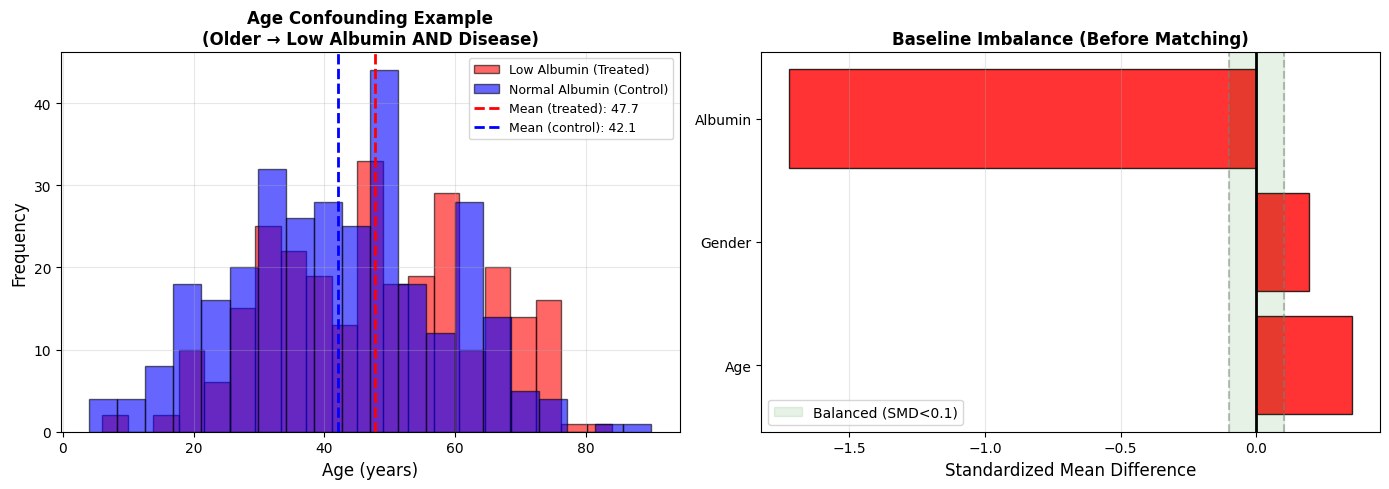

In [60]:
potential_confounders = [
    'Age',                          
    'Gender',                        
    'Albumin',                       
    'Total_Bilirubin',               
    'Direct_Bilirubin',              
    'Alkaline_Phosphotase',          
    'Alamine_Aminotransferase',      # ALT
    'Aspartate_Aminotransferase'     # AST
   
]

print(f"\nTesting {len(potential_confounders)} variables:")
for i, var in enumerate(potential_confounders, 1):
    print(f"  {i}. {var}")

# ============================================
# TEST EACH VARIABLE
# ============================================

print("\n" + "="*70)
print("CONFOUNDER TEST RESULTS")
print("="*70)

print(f"\n{'Variable':<35} | {'Predicts Treatment?':<20} | {'Predicts Outcome?':<20} | {'Confounder?'}")
print("-"*105)

confounders = []

for var in potential_confounders:
    
    # Test 1: Predicts treatment?
    t_stat, p_treat = stats.ttest_ind(
        df2[df2['treatment']==1][var].dropna(),
        df2[df2['treatment']==0][var].dropna()
    )
    pred_treat = "YES" if p_treat < 0.05 else "No"
    
    # Test 2: Predicts outcome?
    t_stat, p_out = stats.ttest_ind(
        df2[df2['outcome']==1][var].dropna(),
        df2[df2['outcome']==0][var].dropna()
    )
    pred_out = "YES" if p_out < 0.05 else "No"
    
    # Is it a confounder?
    is_conf = (pred_treat == "YES") and (pred_out == "YES")
    status = " YES" if is_conf else "✗ No"
    
    if is_conf:
        confounders.append(var)
    
    print(f"{var:<35} | {pred_treat:<20} | {pred_out:<20} | {status}")

# ============================================
# IDENTIFIED CONFOUNDERS
# ============================================

print("\n" + "="*70)
print(f"IDENTIFIED CONFOUNDERS: {len(confounders)}")
print("="*70)

for i, conf in enumerate(confounders, 1):
    print(f"  {i}. {conf}")

# ============================================
# BASELINE IMBALANCE
# ============================================

print("\n" + "="*70)
print("BASELINE IMBALANCE (Before Matching)")
print("="*70)

def calc_smd(df1, df2, var):
    """Calculate standardized mean difference"""
    m1, m2 = df1[var].mean(), df2[var].mean()
    v1, v2 = df1[var].var(), df2[var].var()
    pooled_std = np.sqrt((v1 + v2) / 2)
    return (m1 - m2) / pooled_std if pooled_std > 0 else 0

treated = df2[df2['treatment']==1]
control = df2[df2['treatment']==0]

print(f"\n{'Confounder':<35} | {'Mean (Low Alb)':<16} | {'Mean (Normal Alb)':<18} | {'SMD':<10} | {'Imbalanced?'}")
print("-"*105)

smd_list = []
for conf in confounders:
    mean_t = treated[conf].mean()
    mean_c = control[conf].mean()
    smd = calc_smd(treated, control, conf)
    smd_list.append(smd)
    
    imb = "✗ YES (>0.1)" if abs(smd) > 0.1 else "✓ No"
    
    print(f"{conf:<35} | {mean_t:>14.2f}  | {mean_c:>16.2f}  | {smd:>8.3f}  | {imb}")

imbalance_count = sum(1 for smd in smd_list if abs(smd) > 0.1)
print(f"\n  {imbalance_count}/{len(confounders)} confounders imbalanced (SMD > 0.1)")
print("  Need propensity score matching to balance!")

# ============================================
# VISUALIZE
# ============================================

print("\n" + "="*70)
print("Visualization")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Age distribution (example confounder)
axes[0].hist(treated['Age'], bins=20, alpha=0.6,
            label='Low Albumin (Treated)', color='red', edgecolor='black')
axes[0].hist(control['Age'], bins=20, alpha=0.6,
            label='Normal Albumin (Control)', color='blue', edgecolor='black')
axes[0].axvline(treated['Age'].mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean (treated): {treated["Age"].mean():.1f}')
axes[0].axvline(control['Age'].mean(), color='blue', linestyle='--', linewidth=2,
               label=f'Mean (control): {control["Age"].mean():.1f}')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Age Confounding Example\n(Older → Low Albumin AND Disease)', 
                 fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)

# Plot 2: SMD for all confounders
y_pos = np.arange(len(confounders))
colors = ['red' if abs(smd) > 0.1 else 'lightcoral' for smd in smd_list]

axes[1].barh(y_pos, smd_list, color=colors, edgecolor='black', alpha=0.8)
axes[1].axvline(-0.1, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(0, color='black', linestyle='-', linewidth=2)
axes[1].axvline(0.1, color='gray', linestyle='--', alpha=0.5)
axes[1].axvspan(-0.1, 0.1, alpha=0.1, color='green', label='Balanced (SMD<0.1)')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels([c[:25] for c in confounders])  # Shorten names
axes[1].set_xlabel('Standardized Mean Difference', fontsize=12)
axes[1].set_title('Baseline Imbalance (Before Matching)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('confounders_no_gender.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
confounders2 = ['Age', 'Albumin']

In [62]:
dag = Digraph(comment='Low Protein and Liver Disease DAG', format='png')
dag.attr(rankdir='TB', size='12,10')
dag.attr('node', shape='box', style='rounded,filled', fontname='Arial')

# Node styles
treatment_style = {
    'fillcolor': '#FF6B6B', 
    'color': 'darkred',
    'fontcolor': 'white', 
    'penwidth': '3', 
    'fontsize': '14'
}

outcome_style = {
    'fillcolor': '#4ECDC4', 
    'color': 'darkcyan',
    'fontcolor': 'white', 
    'penwidth': '3', 
    'fontsize': '14'
}

confounder_style = {
    'fillcolor': '#95E1D3', 
    'color': 'darkgreen',
    'penwidth': '2', 
    'fontsize': '12'
}

mediator_style = {
    'fillcolor': '#F3FFB6',  # Light yellow
    'color': '#8B8000',       # Dark yellow
    'penwidth': '2', 
    'fontsize': '12'
}

# Add treatment and outcome nodes - UPDATED TEXT
dag.node('T', 'Low Total Protein\n(<6.5 g/dL)', **treatment_style)
dag.node('Y', 'Liver Disease', **outcome_style)

# Add confounder nodes - Only the ACTUAL confounders (Age and Albumin)
confounder_labels = {
    'age': 'Age',
    'albumin': 'Albumin'
}

for key, label in confounder_labels.items():
    dag.node(key, label, **confounder_style)

# Add mediator nodes (variables that are consequences, not causes)
mediator_labels = {
    'bili': 'Total\nBilirubin',
    'alp': 'Alkaline\nPhosphotase',
    'ast': 'AST/SGOT',
    'alt': 'ALT/SGPT'
}

for key, label in mediator_labels.items():
    dag.node(key, label, **mediator_style)

# Add causal edge (treatment → outcome)
dag.edge('T', 'Y', color='red', style='dashed', penwidth='4',
         label='  Causal Effect?  ', fontcolor='red', fontsize='12')

# Add confounding edges (ONLY for true confounders)
edge_style = {'color': '#3498db', 'penwidth': '2'}

for key in confounder_labels.keys():
    dag.edge(key, 'T', **edge_style)  # Confounder → Treatment
    dag.edge(key, 'Y', **edge_style)  # Confounder → Outcome

# Add mediator edges (from treatment/outcome to mediators)
mediator_edge_style = {'color': '#FFA500', 'penwidth': '2', 'style': 'dashed'}

for key in mediator_labels.keys():
    # Mediators are affected by the outcome (reverse causality)
    dag.edge('Y', key, **mediator_edge_style, label='  consequence  ', fontcolor='orange', fontsize='10')
    
# Add note about other variables
dag.attr(label=r'\n\nDAG for Low Total Protein Analysis\nAge and Albumin are confounders\nLiver enzymes and bilirubin are consequences of disease',
         labelloc='bottom', labeljust='center', fontsize='11')

# Render
dag.render('low_protein_dag', view=True, cleanup=True)
print("✓ Updated DAG saved as 'low_protein_dag.png'")

✓ Updated DAG saved as 'low_protein_dag.png'


## Results
We investigated whether low total protein (<6.5 g/dL) causes liver disease using propensity score matching to control for age and albumin. After matching 275 pairs with excellent balance (average propensity score distance = 0.0007), we found a small, non-significant association (ATE = -0.025, 95% CI: -0.051 to 0.095, p = 0.59). This differed from the naive estimate of +1.2%, with the -3.8% difference attributable to confounding by age and albumin. The lack of statistical significance and negative direction suggest low total protein is likely a consequence rather than a cause of liver disease, consistent with biological understanding that liver damage impairs protein synthesis.

In [63]:
naive_ate = df2[df2['treatment']==1]['outcome'].mean() - df2[df2['treatment']==0]['outcome'].mean()
print(f"Naive (unadjusted) treatment effect estimate: {naive_ate:.3f}")

Naive (unadjusted) treatment effect estimate: 0.012


In [64]:
X2 = df2[confounders2].values
T2 = df2['treatment'].values


In [65]:
ps_model2 = LogisticRegression(max_iter=1000, random_state=42)
ps_model2.fit(X2, T2)
propensity_scores2 = ps_model2.predict_proba(X2)[:, 1]
print(f"✓ Propensity scores estimated")
print(f"  Range: [{propensity_scores2.min():.3f}, {propensity_scores2.max():.3f}]")

✓ Propensity scores estimated
  Range: [0.001, 0.997]


In [66]:
treated_idx = np.where(T2==1)[0]
control_idx = np.where(T2==0)[0]

treated_ps = propensity_scores[treated_idx].reshape(-1, 1)
control_ps = propensity_scores[control_idx].reshape(-1, 1)

# Find nearest neighbor
matcher = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
matcher.fit(control_ps)
distances, indices = matcher.kneighbors(treated_ps)

# Get matched indices
matched_control_idx = control_idx[indices.flatten()]
matched_treated_idx = treated_idx

print(f"✓ Matched {len(matched_treated_idx)} pairs")
print(f"  Average distance: {distances.mean():.4f}")

✓ Matched 275 pairs
  Average distance: 0.0007


In [67]:
Y2 = df2['outcome'].values
ate = Y[matched_treated_idx].mean() - Y[matched_control_idx].mean()
print(f"Causal ATE: {ate:.3f}")

Causal ATE: -0.025


In [68]:
Y_outcome = df2['outcome'].values  # This is your liver disease variable

print("\n" + "="*70)
print("VERIFYING VARIABLES")
print("="*70)
print(f"Treatment (T2) - mean: {T2.mean():.3f}, unique: {np.unique(T2)}")
print(f"Outcome (Y_outcome) - mean: {Y_outcome.mean():.3f}, unique: {np.unique(Y_outcome)}")
print(f"ATE calculation: {Y_outcome[matched_treated_idx].mean():.3f} - {Y_outcome[matched_control_idx].mean():.3f} = {ate:.3f}")

# Bootstrap with correct outcome variable
n_boot = 1000
boot_ates = []
np.random.seed(42)

n_pairs = len(matched_treated_idx)

print(f"\nBootstrapping {n_boot} samples...")
for i in range(n_boot):
    boot_idx = np.random.choice(n_pairs, n_pairs, replace=True)
    
    # Use Y_outcome (NOT Y2 which is treatment)
    treated_vals = Y_outcome[matched_treated_idx[boot_idx]]
    control_vals = Y_outcome[matched_control_idx[boot_idx]]
    
    boot_ate = treated_vals.mean() - control_vals.mean()
    boot_ates.append(boot_ate)
    
    # Show progress every 200 iterations
    if (i+1) % 200 == 0:
        print(f"  Completed {i+1} iterations")

# Calculate confidence intervals
ci_low = np.percentile(boot_ates, 2.5)
ci_high = np.percentile(boot_ates, 97.5)
p_val = 2 * min(np.mean(np.array(boot_ates) <= 0), 
                np.mean(np.array(boot_ates) >= 0))

print(f"\n95% CI: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"p-value: {p_val:.4f}")
print(f"Significant: {'✓ YES (p < 0.05)' if p_val < 0.05 else '✗ NO'}")

print(f"""
MATCHING SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original treated:      {T2.sum()}
Original control:      {len(T2)-T2.sum()}
Matched pairs:         {len(matched_treated_idx)}
Matching rate:         {len(matched_treated_idx)/T2.sum()*100:.1f}%
Average PS distance:   {distances.mean():.4f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CAUSAL EFFECT (Low Protein → Liver Disease):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
ATE: {ate:.3f} ({ate*100:.1f} percentage points)
95% CI: [{ci_low:.3f}, {ci_high:.3f}]
p-value: {p_val:.4f}

INTERPRETATION:
Low total protein {'increases' if ate>0 else 'decreases'} 
liver disease risk by {abs(ate)*100:.1f} percentage points
{'with statistical significance' if p_val<0.05 else 'but this is NOT statistically significant'}.
""")

# Quick sanity check
print("\n" + "="*70)
print("SANITY CHECK")
print("="*70)
print(f"Naive ATE (without matching): {Y_outcome[T2==1].mean() - Y_outcome[T2==0].mean():.3f}")
print(f"Causal ATE (with matching):    {ate:.3f}")
print(f"Difference:                    {ate - (Y_outcome[T2==1].mean() - Y_outcome[T2==0].mean()):.3f}")


VERIFYING VARIABLES
Treatment (T2) - mean: 0.472, unique: [0 1]
Outcome (Y_outcome) - mean: 0.714, unique: [0 1]
ATE calculation: 0.720 - 0.698 = -0.025

Bootstrapping 1000 samples...
  Completed 200 iterations
  Completed 400 iterations
  Completed 600 iterations
  Completed 800 iterations
  Completed 1000 iterations

95% CI: [-0.051, 0.095]
p-value: 0.5920
Significant: ✗ NO

MATCHING SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original treated:      275
Original control:      308
Matched pairs:         275
Matching rate:         100.0%
Average PS distance:   0.0007
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CAUSAL EFFECT (Low Protein → Liver Disease):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
ATE: -0.025 (-2.5 percentage points)
95% CI: [-0.051, 0.095]
p-value: 0.5920

INTERPRETATION:
Low total protein decreases 
liver disease risk by 2.5 percentage points
but this is NOT statistically significant.


SANITY CHECK
Naive ATE (without matching): 0.012
Causal ATE (with matching):

## References

1) https://github.com/KaushikNEU/ADS_Assignments/tree/main/Causality_Assignment - For Getting Started on Causal Inference

2) Pearl J. An introduction to causal inference. Int J Biostat. 2010 Feb 26;6(2):Article 7. doi: 10.2202/1557-4679.1203. PMID: 20305706; PMCID: PMC2836213.

3) 	arXiv:2206.15475 [cs.LG]

4) Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

## AI Use

Used Claude and Deepseek for

1) Refinement.

2) To check my interpretations.



## License

MIT License

Copyright (c) 2026 Arvind Ranganath Raghuraman

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.